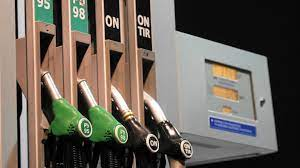</img>


# Ceny paliwa w Polsce

## lata 2004 - 2022

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


* https://pl.investing.com/commodities/brent-oil-historical-data 
* https://www.nbp.pl/kursy/Archiwum/archiwum_tab_a_2022.csv
* https://www.lotos.pl/145/type,oil_eurodiesel/dla_biznesu/hurtowe_ceny_paliw/archiwum_cen_paliw
* https://www.lotos.pl/145/type,oil_95/dla_biznesu/hurtowe_ceny_paliw/archiwum_cen_paliw
* https://www.cargopedia.pl/europejskie-ceny-paliw
* https://ru-geld.de/pl/salary/europe.html#average


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
col_names_petrol = ['unnamed', 'date', 'price', 'excise', 'Fuel surcharge']
petrol_df = pd.read_csv('data/petrol95.csv', parse_dates=['date'], names=col_names_petrol, index_col='date',
                        usecols=col_names_petrol[1:], decimal=',', header=0, thousands=' ')
petrol_df['price'] = petrol_df['price'] / 1000
petrol_df['Fuel surcharge'] = petrol_df['Fuel surcharge'] / 10000
petrol_df['excise'] = petrol_df['excise'] / 1000

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Cena PB95 PLN
#### Lata 2004 - 2022

In [3]:
petrol_df.head()

,price,excise,Fuel surcharge
date,,,
2022-06-06,7.521,1.413,1.5261
2022-06-02,7.521,1.413,1.5261
2022-06-01,7.406,1.413,1.5261
2022-05-31,7.211,1.413,1.5261
2022-05-28,7.120,1.413,1.5261


In [4]:
petrol_df.describe()

,price,excise,Fuel surcharge
count,4461.000000,4461.000000,4461.000000
mean,3.690408,1.529974,1.111051
std,0.609979,0.064309,0.266544
min,2.428000,1.315000,0.792800
25%,3.300000,1.540000,0.874000
50%,3.573000,1.540000,1.031600
75%,4.110000,1.565000,1.314000
max,7.521000,1.565000,1.651400


<AxesSubplot:xlabel='date'>

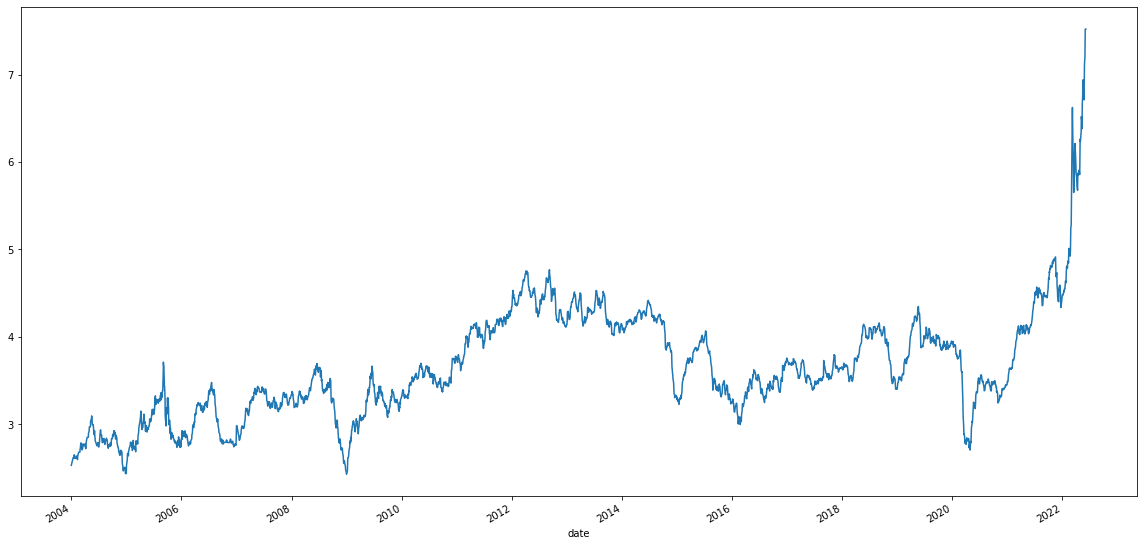

In [5]:
petrol_df.price.plot(figsize=(20,10))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Podatek a cena paliwa
#### VAT 8%

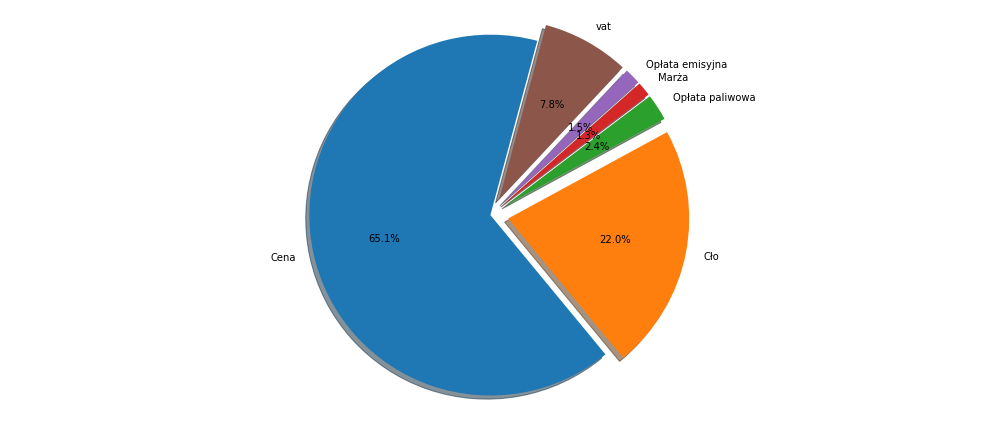

In [6]:
tax_df = petrol_df.copy()
mask = (tax_df.index.year > 2021) & (tax_df.index.month > 2)
tax_df = tax_df[mask]
labels = 'Cena', 'Cło', 'Opłata paliwowa', 'Marża', 'Opłata emisyjna', "vat"
excise = tax_df['excise'].mean()
fuel_surcharge = tax_df['Fuel surcharge'].mean() / 10
vat = tax_df['price'].mean() * 0.08
emission_tax = tax_df['price'].mean() * 0.015
margin = tax_df['price'].mean() * 0.013
price_without_tax = tax_df['price'].mean() - excise - fuel_surcharge - vat
- emission_tax - margin
sizes = [price_without_tax, excise, fuel_surcharge, margin, emission_tax, vat]
explode = (0, 0.1, 0.1,0.1,0.1,0.1)
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=75)
ax1.axis('equal')
plt.tight_layout()
plt.show()

#### VAT 23%

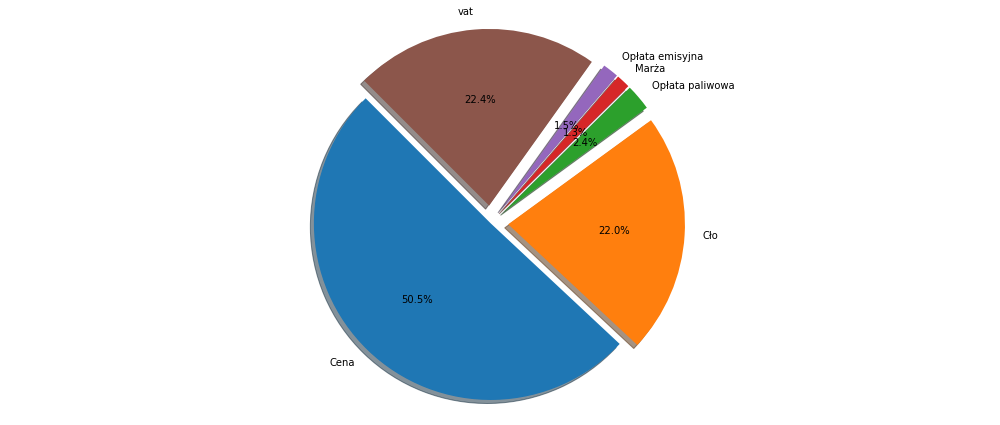

In [7]:
tax_df = petrol_df.copy()
mask = (tax_df.index.year > 2021) & (tax_df.index.month > 2)
tax_df = tax_df[mask]
labels = 'Cena', 'Cło', 'Opłata paliwowa', 'Marża', 'Opłata emisyjna', "vat"
excise = tax_df['excise'].mean()
fuel_surcharge = tax_df['Fuel surcharge'].mean() / 10
vat = tax_df['price'].mean() * 0.23
emission_tax = tax_df['price'].mean() * 0.015
margin = tax_df['price'].mean() * 0.013
price_without_tax = tax_df['price'].mean() - excise - fuel_surcharge - vat
- emission_tax - margin
sizes = [price_without_tax, excise, fuel_surcharge, margin, emission_tax, vat]
explode = (0, 0.1, 0.1,0.1,0.1,0.1)
fig, ax1 = plt.subplots(figsize=(14,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=135)
ax1.axis('equal')
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Cena PB95 Europa
### 30. maja 2022

In [8]:
country_fuel_df = pd.read_csv('data/country_fuels_price.csv', header=None)
country_fuel_df.drop([0, 1], inplace=True)
country_fuel_df = country_fuel_df[[1, 3]]
country_fuel_df.rename(columns={1: "Kraj", 3: 'PB95 PLN'}, inplace=True)
country_fuel_df.set_index('Kraj', inplace=True)
country_fuel_df['PB95 PLN'] = pd.to_numeric(country_fuel_df['PB95 PLN'])
country_fuel_df['PB95 PLN'] = country_fuel_df['PB95 PLN'] / 1000
country_fuel_df.head()

,PB95 PLN
Kraj,
Polska,7.363
Albania,8.922
Andora,7.948
Austria,8.410
Białoruś,3.013


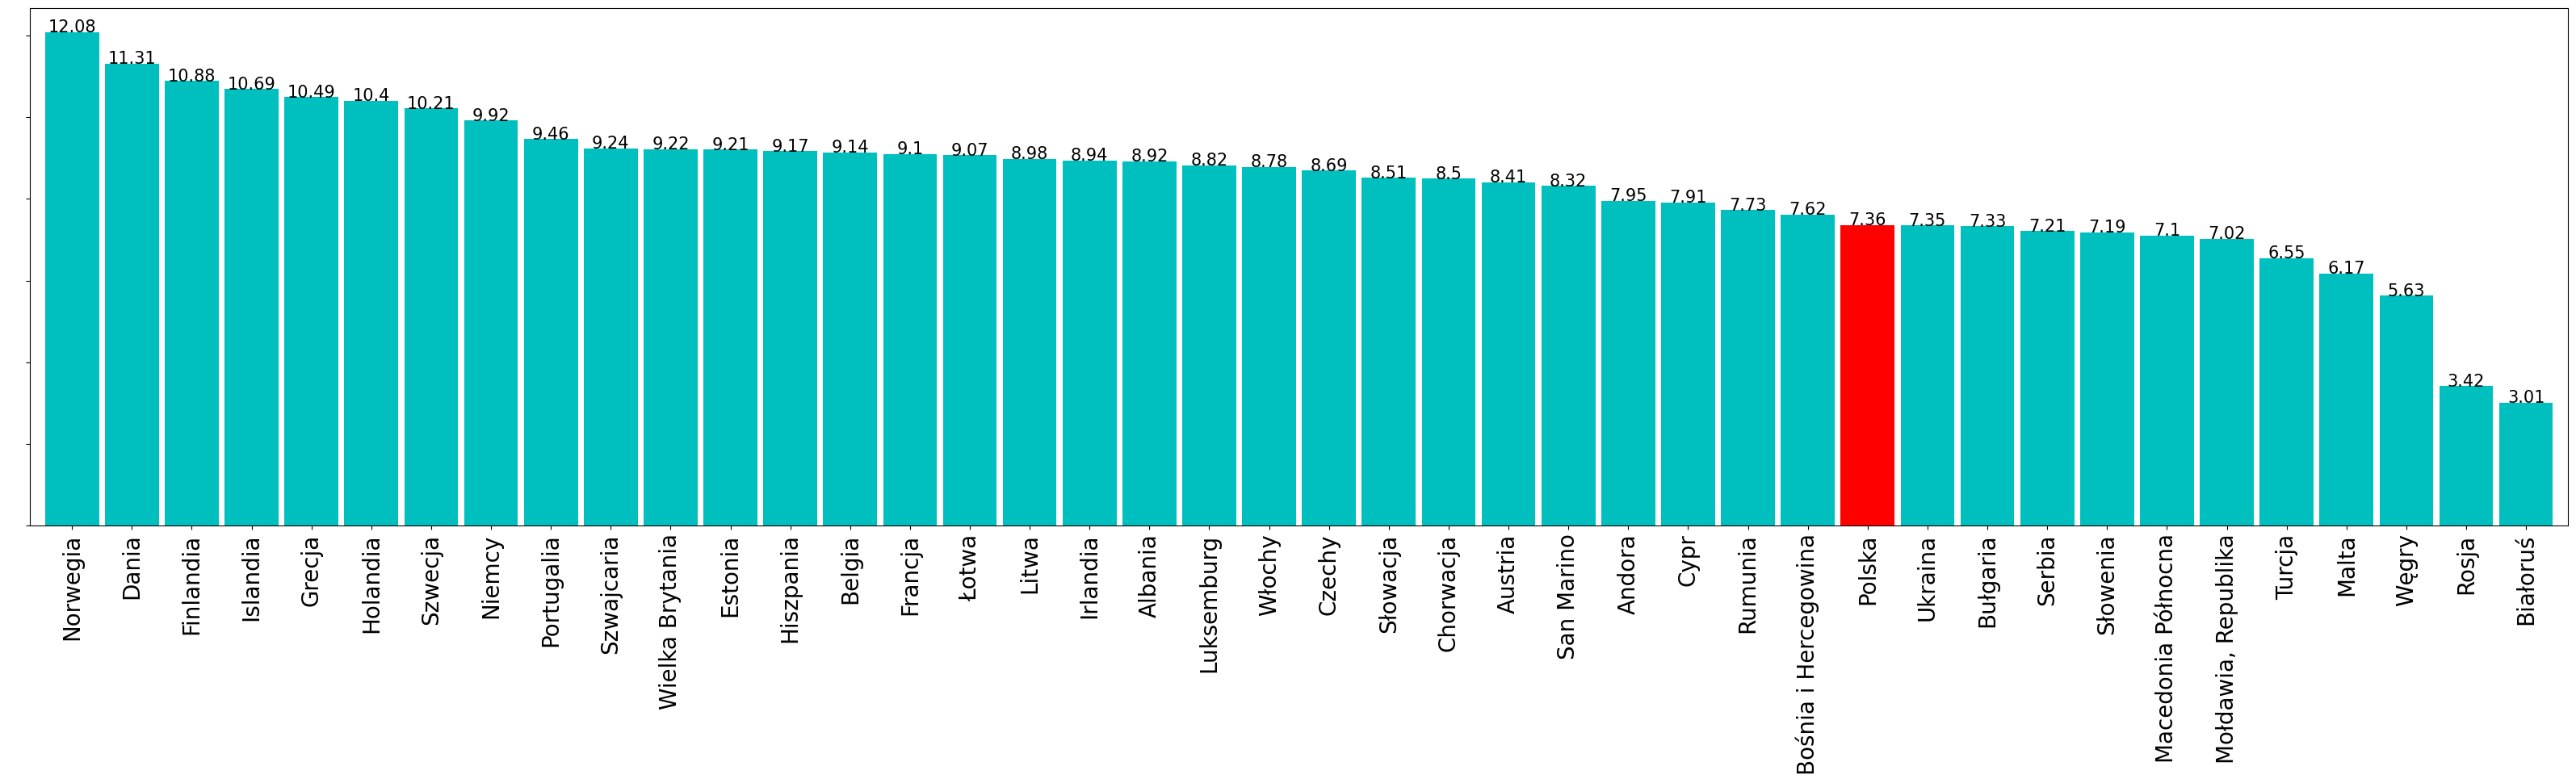

In [9]:
country_fuel_df.sort_values('PB95 PLN', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(32, 10), dpi=100)
colors = ['r' if _ == 'Polska' else 'c' for _ in country_fuel_df.index]
country_fuel_df['PB95 PLN'].plot(kind='bar', color=colors, width=0.9)
x = np.arange(len(country_fuel_df))
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticks(x)
plt.yticks(color='w')
plt.tight_layout()
ax.set(xlabel=None)
y = round(country_fuel_df['PB95 PLN'], 2)
for i in range(len(country_fuel_df)):
    plt.text(i, y[i], y[i], ha='center', fontsize=15)
fig.savefig('country_bar.png')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Cena oleju napędowego PLN

In [10]:
col_names_diesel = ['unnamed', 'date', 'diesel', 'excise', 'Fuel surcharge']
diesel_df = pd.read_csv('data/euro_diesel.csv', parse_dates=['date'], names=col_names_diesel, index_col='date',
                        usecols=col_names_diesel[1:], decimal=',', header=0, thousands=' ')
diesel_df.diesel = diesel_df.diesel / 1000
diesel_df.excise =  diesel_df.excise / 1000
diesel_df['Fuel surcharge'] = diesel_df['Fuel surcharge'] / 10000
diesel_df.drop(diesel_df.tail(149).index, inplace=True)

In [11]:
diesel_df.head()

,diesel,excise,Fuel surcharge
date,,,
2022-06-06,7.152,1.104,3.2912
2022-06-02,7.174,1.104,3.2912
2022-06-01,6.912,1.104,3.2912
2022-05-31,6.750,1.104,3.2912
2022-05-28,6.699,1.104,3.2912


In [12]:
diesel_df.describe()

,diesel,excise,Fuel surcharge
count,4312.000000,4312.000000,4312.000000
mean,3.647999,1.122776,2.305261
std,0.688969,0.062506,0.880211
min,2.443000,1.048000,0.887300
25%,3.110750,1.048000,0.978200
50%,3.577000,1.151000,2.599200
75%,4.113000,1.171000,2.930500
max,7.699000,1.196000,3.385300


<AxesSubplot:xlabel='date'>

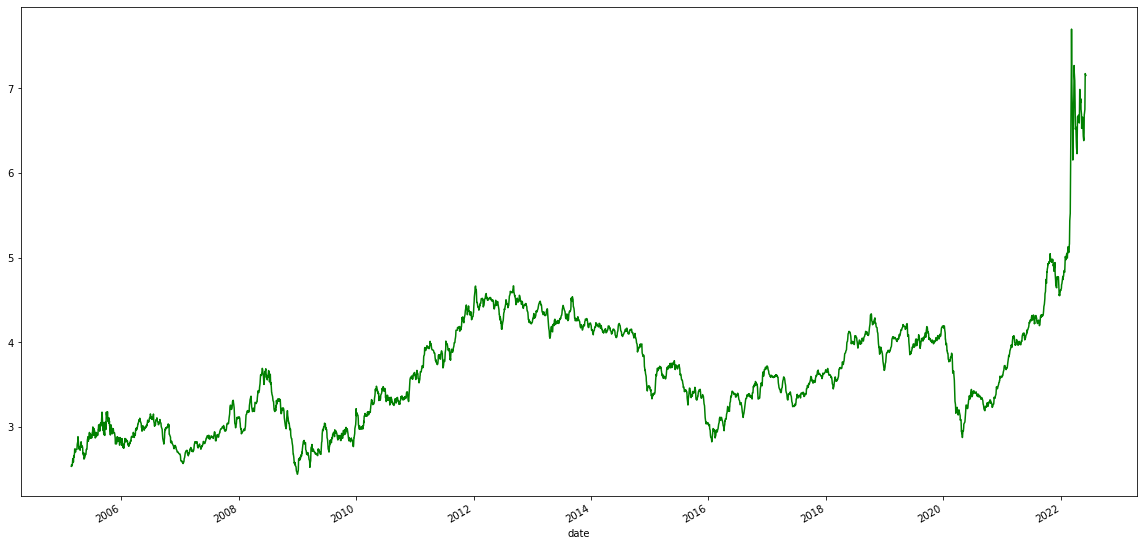

In [13]:
diesel_df.diesel.plot(figsize=(20,10), color='g')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Cena baryłki ropy USD
#### 2022

In [14]:
col_names_oil = ["date", "last", "open", "maximum", "minimum", "vol", "change"]
oil_df = pd.read_csv('data/oil.csv', names=col_names_oil,  index_col='date', parse_dates=['date'],
                     decimal=',', thousands=' ', header=0, dayfirst=True)

In [15]:
oil_df.head()

,last,open,maximum,minimum,vol,change
date,,,,,,
2022-06-03,119.72,118.22,121.45,116.02,"141,66K","1,79%"
2022-06-02,117.61,115.02,118.46,112.45,"216,90K","3,57%"
2022-06-01,113.56,113.14,115.44,112.41,"172,76K","-1,76%"
2022-05-31,115.60,118.20,120.80,115.15,"360,17K","-1,70%"
2022-05-30,117.60,115.47,117.94,115.32,"145,09K","-1,53%"


In [16]:
oil_df.describe()

,last,open,maximum,minimum
count,110.000000,110.000000,110.000000,110.000000
mean,102.513364,102.273364,104.915727,99.899727
std,11.504266,11.806078,12.674812,10.645011
min,78.980000,78.110000,79.280000,77.040000
25%,92.760000,91.862500,93.775000,90.677500
50%,104.970000,105.155000,107.835000,102.620000
75%,111.135000,111.417500,113.977500,108.210000
max,127.980000,130.280000,139.130000,121.310000


<AxesSubplot:xlabel='date'>

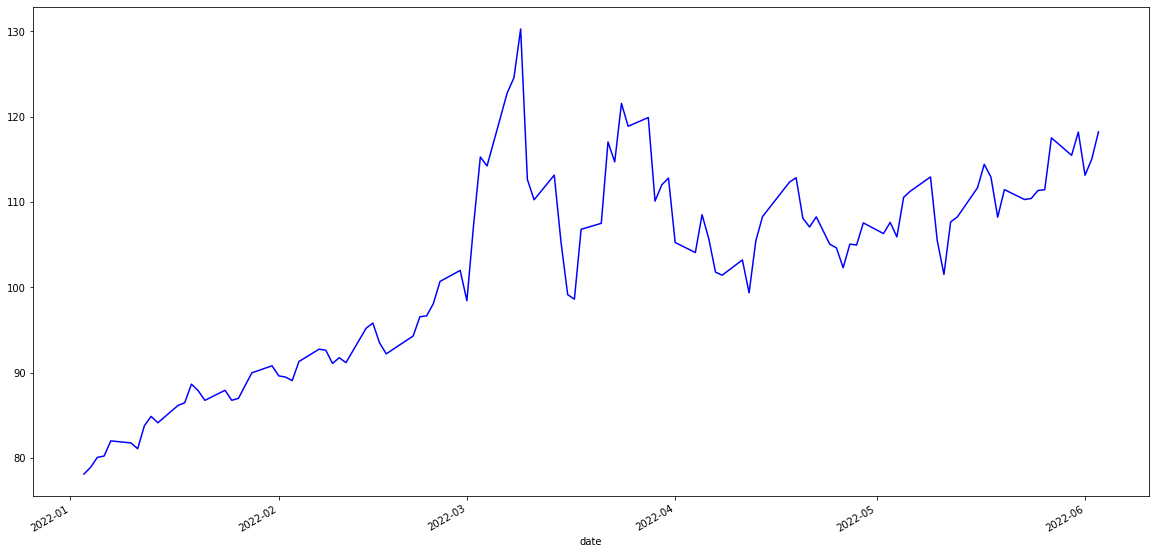

In [17]:
oil_df.open.plot(figsize=(20,10), color='b')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Kurs dolara
#### 2022

In [18]:
usd_df = pd.read_csv('data/exchange.csv', parse_dates=['date'], index_col='date')

In [19]:
usd_df.describe()

,usd
count,107.000000
mean,4.214610
std,0.172862
min,3.921800
25%,4.033950
50%,4.265100
75%,4.327950
max,4.572200


In [20]:
usd_df.head()

,usd
date,
2022-01-03,4.0424
2022-01-04,4.0468
2022-01-05,4.0396
2022-01-07,4.0279
2022-01-10,4.0064


<AxesSubplot:xlabel='date'>

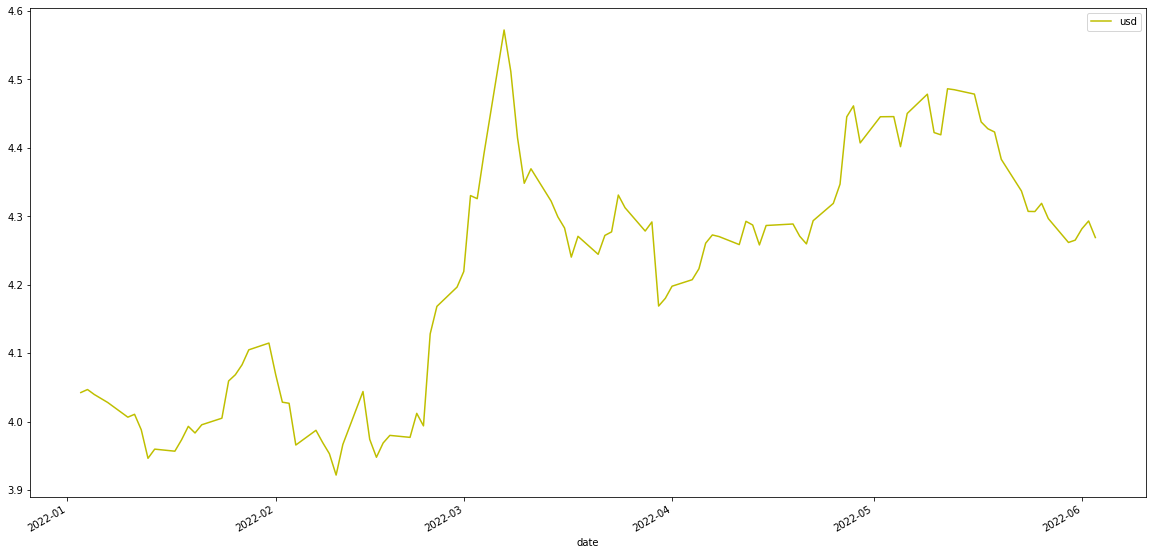

In [21]:
usd_df.plot(figsize=(20,10), color='y')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
### Ceny paliw
#### Luty - Czerwiec 2022

In [22]:
petrol_df['oil'] = oil_df.open
petrol_df['usd'] = usd_df.usd
petrol_df['diesel'] = diesel_df.diesel
petrol_df.head()
pp_df = petrol_df.copy()
mask = (petrol_df.index.year > 2021) & (petrol_df.index.month > 1)
pp_df = pp_df[mask]
pp_df = pp_df.fillna(method="bfill")
pp_df = pp_df.fillna(method="ffill")
pp_df['Baryłka ropy w PLN'] = pp_df.oil * pp_df.usd
pp_df

,price,excise,Fuel surcharge,oil,usd,diesel,Baryłka ropy w PLN
date,,,,,,,
2022-06-06,7.521,1.413,1.5261,115.02,4.2931,7.152,493.792362
2022-06-02,7.521,1.413,1.5261,115.02,4.2931,7.174,493.792362
2022-06-01,7.406,1.413,1.5261,113.14,4.2817,6.912,484.431538
2022-05-31,7.211,1.413,1.5261,118.20,4.2651,6.750,504.134820
2022-05-28,7.120,1.413,1.5261,117.52,4.2966,6.699,504.936432
...,...,...,...,...,...,...,...
2022-02-05,4.832,1.413,1.5261,91.30,3.9657,5.029,362.068410
2022-02-04,4.790,1.413,1.5261,91.30,3.9657,4.986,362.068410
2022-02-03,4.784,1.413,1.5261,89.07,4.0267,4.976,358.658169


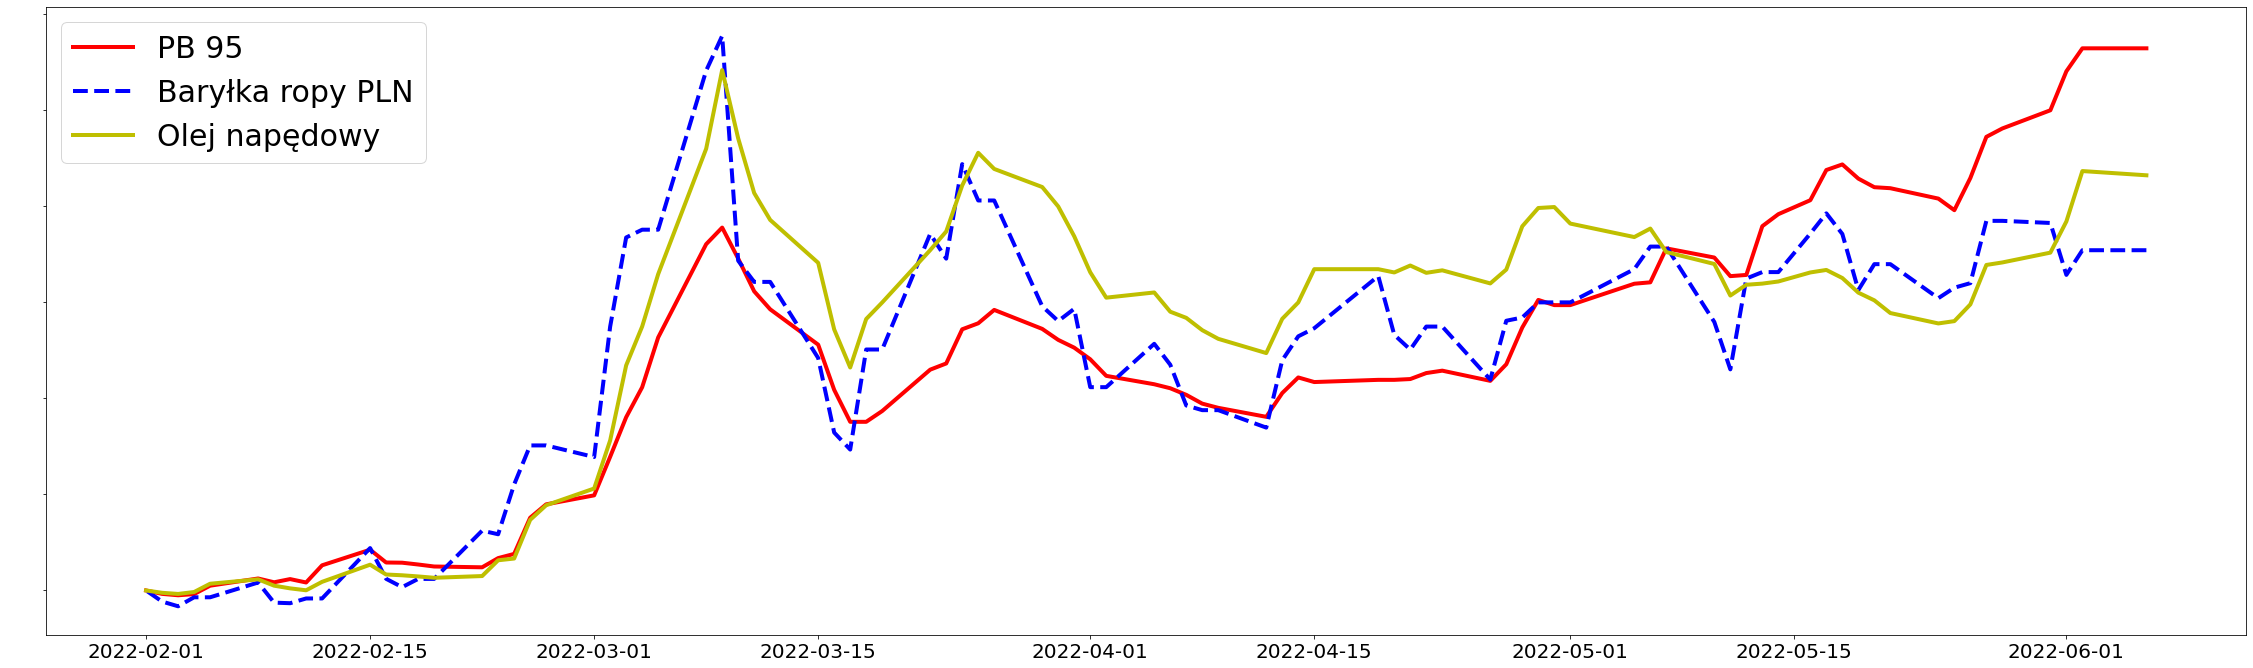

In [23]:
    pp_df['oilPLN'] = pp_df['Baryłka ropy w PLN'] / pp_df.iloc[-1]['Baryłka ropy w PLN']
    pp_df['price95'] = pp_df.price / pp_df.iloc[-1].price
    pp_df.diesel = pp_df.diesel / pp_df.iloc[-1].diesel

    fig, ax = plt.subplots(figsize=(32, 10))
    plt.yticks(color='w')
    plt.rcParams.update({'font.size': 30})
    plt.tick_params(labelsize=20)    
    x = pp_df.index
    y = pp_df.price95
    ax.plot(x, y, 'r', label='PB 95', linewidth=4)
    y = pp_df.oilPLN
    ax.plot(x, y, 'b--', label='Baryłka ropy PLN', linewidth=4)
    y = pp_df.diesel
    ax.plot(x, y, 'y', label='Olej napędowy', linewidth=4)
    ax.legend()
    plt.tight_layout()
